In [1]:
import csv

articles = {}
article_groups = []
group_articles = []
for i in range(20):
    group_articles.append([])
    
max_word = -1

with open('data/p2/data50.csv') as csvfile:
    reader = csv.reader(csvfile)
    for row in reader:
        article = int(row[0]) - 1
        if article not in articles:
            articles[article] = {}
        word = int(row[1]) - 1
        max_word = max(max_word, word)
        count = int(row[2])
        articles[article][word] = count

with open('data/p2/groups.csv') as file:
    groups = [l.strip() for l in file.readlines()]

with open('data/p2/label.csv') as file:
    article = 0
    for line in file:
        group = int(line) - 1
        article_groups.append(group)
        group_articles[group].append(article)
        article += 1

In [2]:
import math
import numpy as np

def jaccard(a1, a2):
    sum_min = 0
    sum_max = 0
    present_words = set.union(set(a1.keys()), set(a2.keys()))
    for w in present_words:
        c1 = a1.get(w, 0)
        c2 = a2.get(w, 0)
        sum_min += min(c1, c2)
        sum_max += max(c1, c2)
    return sum_min / sum_max

def l2(a1, a2):
    sumsq = 0.0
    present_words = set.union(set(a1.keys()), set(a2.keys()))
    for w in present_words:
        c1 = a1.get(w, 0)
        c2 = a2.get(w, 0)
        sumsq += (c1 - c2) ** 2
    return -math.sqrt(sumsq)

def cos(a1, a2):
    def norm(a):
        ssq = 0
        for v in a.values():
            ssq += v ** 2
        return math.sqrt(ssq)
    summult = 0
    present_words = set.union(set(a1.keys()), set(a2.keys()))
    for w in present_words:
        c1 = a1.get(w, 0)
        c2 = a2.get(w, 0)
        summult += c1 * c2
    return summult / (norm(a1) * norm(a2))

def get_sim_matrix(comparison):
    data = np.zeros((20, 20), dtype=float)
    for g1 in range(20):
        for g2 in range(g1, 20):
            sm = 0
            cnt = 0
            for a1 in group_articles[g1]:
                for a2 in group_articles[g2]:
                    cnt += 1
                    sm += comparison(articles[a1], articles[a2])
            avg = sm / cnt
            data[g1][g2] = avg
            data[g2][g1] = avg
    return data

jaccard_matrix = get_sim_matrix(jaccard)
l2_matrix = get_sim_matrix(l2)
cos_matrix = get_sim_matrix(cos)

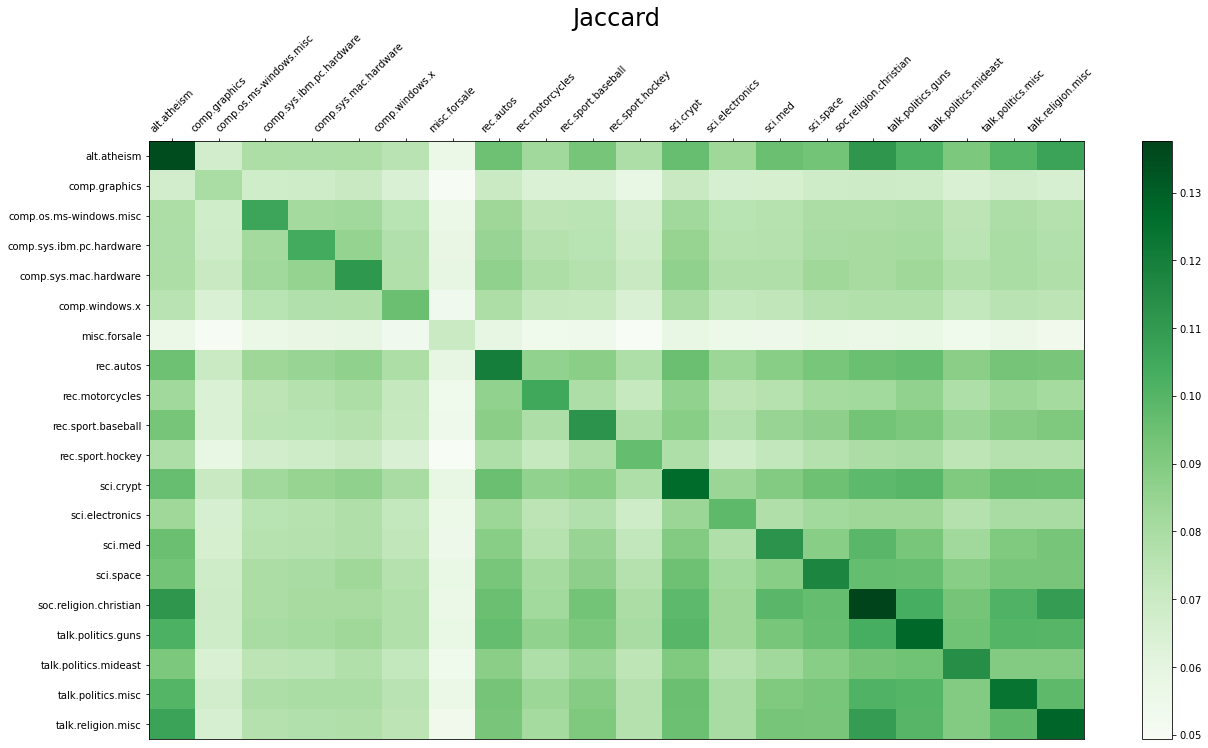

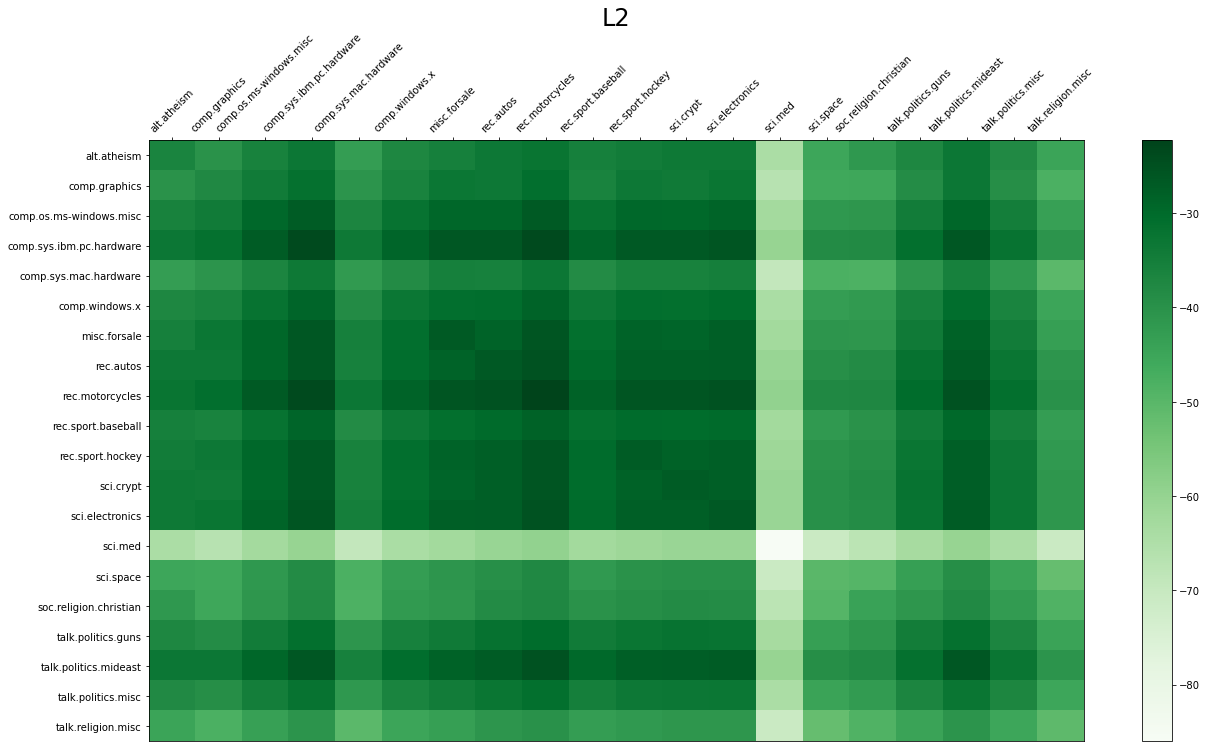

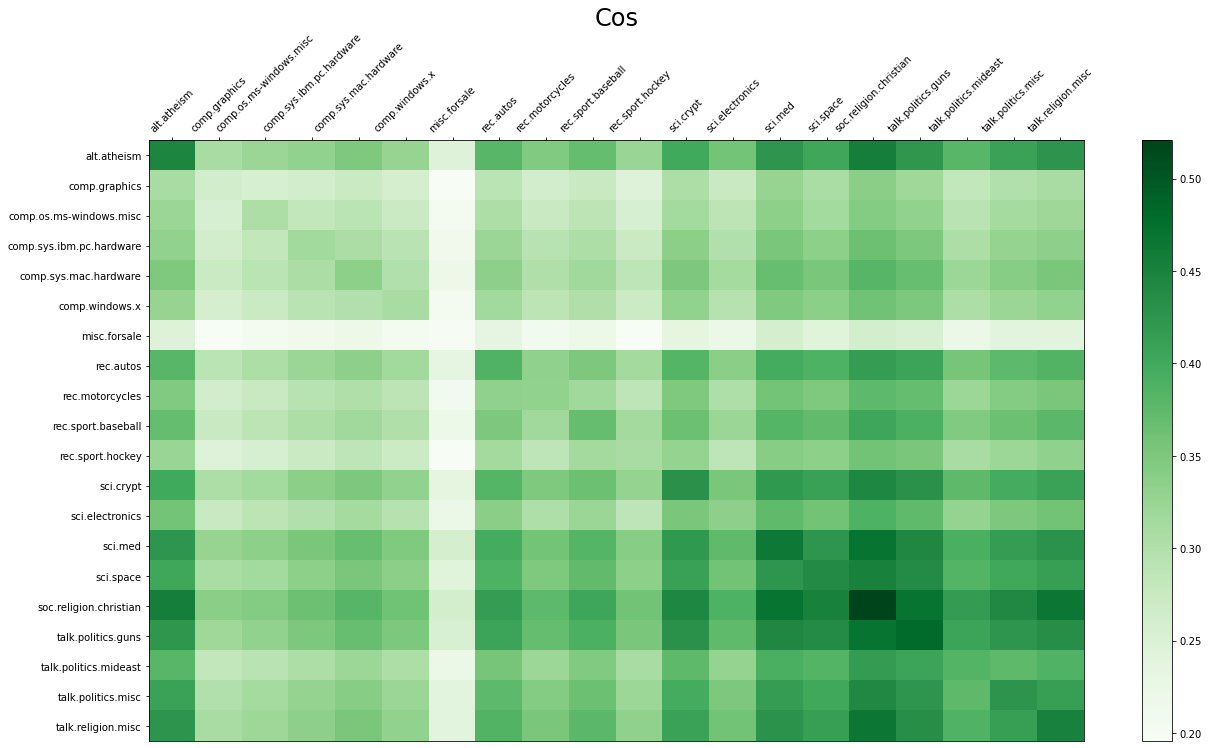

In [3]:
import matplotlib.pyplot as plt
import warnings

# Mostly borrowed from http://web.stanford.edu/class/cs168/makeHeatMap.py
def makeHeatMap(data, names, color, title):
    #to catch "falling back to Agg" warning
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        #code source: http://stackoverflow.com/questions/14391959/heatmap-in-matplotlib-with-pcolor
        fig, ax = plt.subplots()
        plt.title(title, fontsize=24)
        fig.set_size_inches(18.5, 10.5)

        #create the map w/ color bar legend
        heatmap = ax.pcolor(data, cmap=color)
        cbar = plt.colorbar(heatmap)
        
        # put the major ticks at the middle of each cell
        ax.set_xticks(np.arange(data.shape[0])+0.5, minor=False)
        ax.set_yticks(np.arange(data.shape[1])+0.5, minor=False)

        # want a more natural, table-like display
        ax.invert_yaxis()
        ax.xaxis.tick_top()

        ax.set_xticklabels(names, rotation = 45)
        ax.set_yticklabels(names)

        plt.tight_layout()

        plt.show()
        plt.close()

makeHeatMap(jaccard_matrix, groups, 'Greens', 'Jaccard')
makeHeatMap(l2_matrix, groups, 'Greens', 'L2')
makeHeatMap(cos_matrix, groups, 'Greens', 'Cos')